In [1]:
# 20.1 Problem Definition

In [2]:
# - Investigate Boston House Price dataset

In [3]:
# - Attributes:

# - 1. CRIM: per capita crime rate by town
# - 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# - 3. INDUS: proportion of non-retail business acres per town
# - 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - 5. NOX: nitric oxides concentration (parts per 10 million)
# - 6. RM: average number of rooms per dwelling
# - 7. AGE: proportion of owner-occupied units built prior to 1940 
# - 8. DIS: weighted distances to five Boston employment centers 
# - 9. RAD: index of accessibility to radial highways
# - 10. TAX: full-value property-tax rate per $10,000
# - 11. PTRATIO: pupil-teacher ratio by town
# - 12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town 
# - 13. LSTAT: % lower status of the population
# - 14. MEDV: Median value of owner-occupied homes in $1000s

# - We can see that the input attributes have a mixture of units.

In [4]:
# 20.2 Load the Dataset

In [5]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# Load dataset
_uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

In [7]:
_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']

In [8]:
_dataset = read_csv(_uri, delim_whitespace=True, names=_names)

In [9]:
# 20.3 Analyze Data

In [10]:
# 20.3.1 Descriptive Statistics

In [11]:
_dataset.shape

(506, 14)

In [12]:
# - We can see that all of the attributes are numeric, mostly real values (float) and some have been 
# interpreted as integers (int).
_dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
_dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [14]:
# - We now have a better feeling for how different the attributes are. 
# - The min and max values as well are the means vary a lot. 
# - We are likely going to get better results by rescaling the data in some way.
set_option('precision',2)
_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [15]:
_dataset.corr(method='pearson')

# - We can see that many of the attributes have a strong correlation (> 0.70 or < −0.70). 
# - For example:   
    # - NOX and INDUS with 0.77.
    # - DIS and INDUS with -0.71.
    # - TAX and INDUS with 0.72.
    # - AGE and NOX with 0.73.
    # - DIS and NOX with -0.78.
    # - It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [16]:
# 20.4 Data Visualizations

In [17]:
# 20.4.1 Unimodal Data Visualizations

In [18]:
_dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbcea58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1115387f0>]], dtype=object)

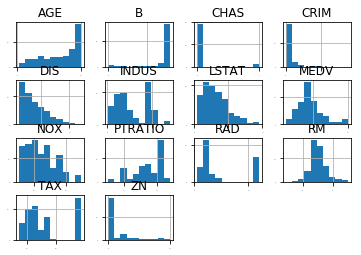

In [19]:
pyplot.show()

In [20]:
# - We can see that:
    # - some attributes may have an exponential distribution, such as CRIM, ZN, AGE and B. 
    # - others may have a bimodal distribution such as RAD and TAX.

In [21]:
_dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111a1cb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111f430b8>]], dtype=object)

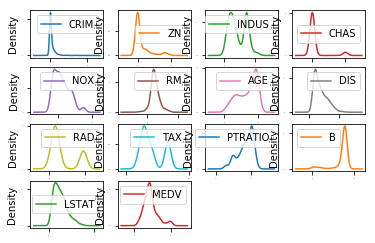

In [22]:
pyplot.show()

In [23]:
# - This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. 

# - It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later 
# with transforms.

In [24]:
_dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)

CRIM           Axes(0.125,0.71587;0.168478x0.16413)
ZN          Axes(0.327174,0.71587;0.168478x0.16413)
INDUS       Axes(0.529348,0.71587;0.168478x0.16413)
CHAS        Axes(0.731522,0.71587;0.168478x0.16413)
NOX           Axes(0.125,0.518913;0.168478x0.16413)
RM         Axes(0.327174,0.518913;0.168478x0.16413)
AGE        Axes(0.529348,0.518913;0.168478x0.16413)
DIS        Axes(0.731522,0.518913;0.168478x0.16413)
RAD           Axes(0.125,0.321957;0.168478x0.16413)
TAX        Axes(0.327174,0.321957;0.168478x0.16413)
PTRATIO    Axes(0.529348,0.321957;0.168478x0.16413)
B          Axes(0.731522,0.321957;0.168478x0.16413)
LSTAT            Axes(0.125,0.125;0.168478x0.16413)
MEDV          Axes(0.327174,0.125;0.168478x0.16413)
dtype: object

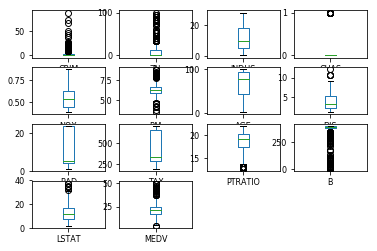

In [25]:
pyplot.show()

In [26]:
# - This helps point out the skew in many distributions so much so that data looks like outliers 
# (e.g. beyond the whisker of the plots).

In [27]:
# 20.4.2 Multimodal Data Visualizations

In [28]:
scatter_matrix(_dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1124efc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11753c5c0>]], dtype=object)

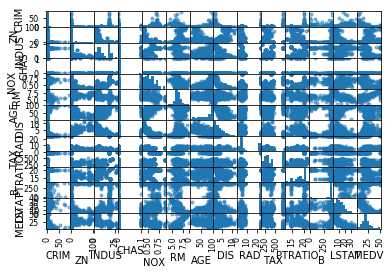

In [29]:
pyplot.show()

In [30]:
# - We can see that some of the higher correlated attributes do show good structure in their relationship. 

# - Not linear, but nice predictable curved relationships.

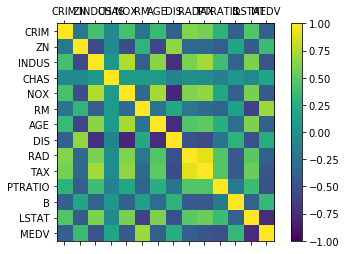

In [31]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(_dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(_names)
ax.set_yticklabels(_names)
pyplot.show()

In [32]:
# - We can also see some dark yellow and dark blue that suggest candidates for removal to better improve 
# accuracy of models later on.

In [33]:
# 20.4.3 Summary of Ideas

In [34]:
# - There is a lot of structure in this dataset. 

# - We need to think about transforms that we could use later to better expose the structure which in turn 
# may improve modeling accuracy. 

# - So far it would be worth trying:
    # - Feature selection and removing the most correlated attributes.
    # - Normalizing the dataset to reduce the effect of differing scales.
    # - Standardizing the dataset to reduce the effects of differing distributions.

# - With lots of additional time I would also explore the possibility of binning (discretization) of the data. 
# This can often improve accuracy for decision tree algorithms.

In [35]:
# 20.5 Validation Dataset

In [36]:
_array = _dataset.values

In [37]:
_X = _array[:,0:13]

In [38]:
_Y = _array[:,13]

In [39]:
_test_size = 0.20

In [40]:
_seed = 7

In [41]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(_X, _Y, test_size=_test_size, random_state=_seed)

In [42]:
# 20.6 Evaluate Algorithms: Baseline

In [43]:
_num_folds = 10

In [44]:
_scoring = 'neg_mean_squared_error' # 0 is perfect

In [45]:
# Spot-Check Algorithms
models = []

# linear algorithms
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet()))

# nonlinear algorithms
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [46]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=_num_folds, random_state=_seed)
    cv_results = cross_val_score(model, _X_train, _Y_train, cv=kfold, scoring=_scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.942835 (12.672227)
SVR: -85.518342 (31.994798)


In [47]:
# LR and then CART

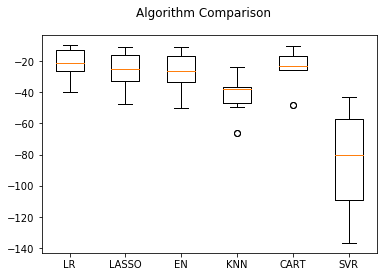

In [48]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [49]:
# - The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps 
# more so for SVR and KNN.

In [50]:
# 20.7 Evaluate Algorithms: Standardization

In [51]:
# - Standardization is where the data is transformed such that each attribute has a mean value of zero and 
# a standard deviation of 1. 

# - We also need to avoid data leakage when we transform the data. 

# - A good way to avoid leakage is to use pipelines that standardize the data and build the model for each 
# fold in the cross-validation test harness. 

In [52]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [53]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=_num_folds, random_state=_seed)
    cv_results = cross_val_score(model, _X_train, _Y_train, cv=kfold, scoring=_scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -22.221297 (8.951462)
ScaledSVR: -29.633086 (17.009186)


In [54]:
# - We can see that scaling did have an effect on KNN, driving the error lower than the other models.

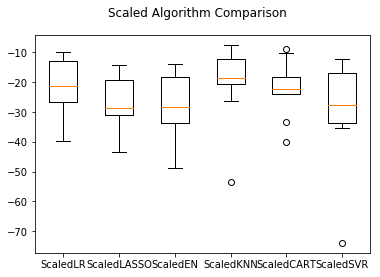

In [55]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [56]:
# 20.8 Improve Results With Tuning

In [57]:
# - We know from the results in the previous section that KNN achieves good results on a scaled version 
# of the dataset. 

# - But can it do better. 

# - The default value for the number of neighbors in KNN is 7. 

# - We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score.

In [58]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(_X_train)
rescaledX = scaler.transform(_X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=_num_folds, random_state=_seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=_scoring, cv=kfold)
grid_result = grid.fit(rescaledX, _Y_train)

In [59]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In [60]:
# 20.9 Ensemble Methods

In [61]:
# - Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.

In [62]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

In [63]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=_num_folds, random_state=_seed)
    cv_results = cross_val_score(model, _X_train, _Y_train, cv=kfold, scoring=_scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.887553 (6.119162)
ScaledGBM: -10.166619 (4.504687)
ScaledRF: -12.689299 (6.399766)
ScaledET: -11.033590 (6.139193)


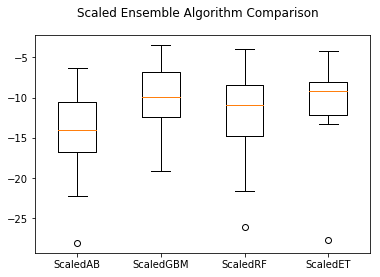

In [64]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [65]:
# - It looks like Gradient Boosting has a better mean score.

# - It also looks like Extra Trees has a similar distribution and perhaps a better median score.

In [66]:
# 20.10 Tune Ensemble Methods

In [67]:
# - The default number of boosting stages to perform (n estimators) is 100. 

# - This is a good candidate parameter of Gradient Boosting to tune. 

# - Often, the larger the number of boosting stages, the better the performance but the longer the training time. 

# - In this section we will look at tuning the number of stages for gradient boosting.

In [68]:
# Tune scaled GBM
scaler = StandardScaler().fit(_X_train)
rescaledX = scaler.transform(_X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=_seed)
kfold = KFold(n_splits=_num_folds, random_state=_seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=_scoring, cv=kfold)
grid_result = grid.fit(rescaledX, _Y_train)

In [69]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


In [70]:
# - We can see that the best configuration was n estimators=400 resulting in a mean squared error of -9.356471, 
# about 0.65 units better than the untuned method

In [71]:
# 20.11 Finalize Model

In [72]:
# prepare the model
scaler = StandardScaler().fit(_X_train)
rescaledX = scaler.transform(_X_train)
model = GradientBoostingRegressor(random_state=_seed, n_estimators=400)
model.fit(rescaledX, _Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [73]:
# transform the validation dataset
rescaledValidationX = scaler.transform(_X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(_Y_test, predictions))

11.8752520792


In [74]:
# - We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.